### Figure 2. SparseStack: OSI but not OSE?

Estimates for injectivity $\alpha$ (*left*) and dilation $\beta$ (*right*)
of SparseStack test matrices
with constant row sparsity $\zeta$ and embedding
dimension $k = 2r$, applied to subspaces with
dimension $r = 10^2$ to $r = 10^7$.

The markers track the median over 10 trials;
shaded regions are bounded by the 10% and 90% quantiles.

We estimate $\alpha, \beta$ by considering the
adversarial orthonormal matrix
$\mathbf{Q} \coloneqq [\mathbf{e}_1 ~ \cdots ~ \mathbf{e}_r]$.

The dashed lines mark the asymptotic value
of the injectivity $(1 - 1/\sqrt{2})^2$
and of the dilation $(1 + 1/\sqrt{2})^2$
of a $2r \times r$ Gaussian test matrix (\cref{def:gauss-test})
as $r \to \infty$.

The experiment supports \cref{conj:constant-sparsity},
which speculates that the SparseStack matrix
has constant injectivity $\alpha$,
while the dilation $\beta$ increases with
the subspace dimension $r$.

---

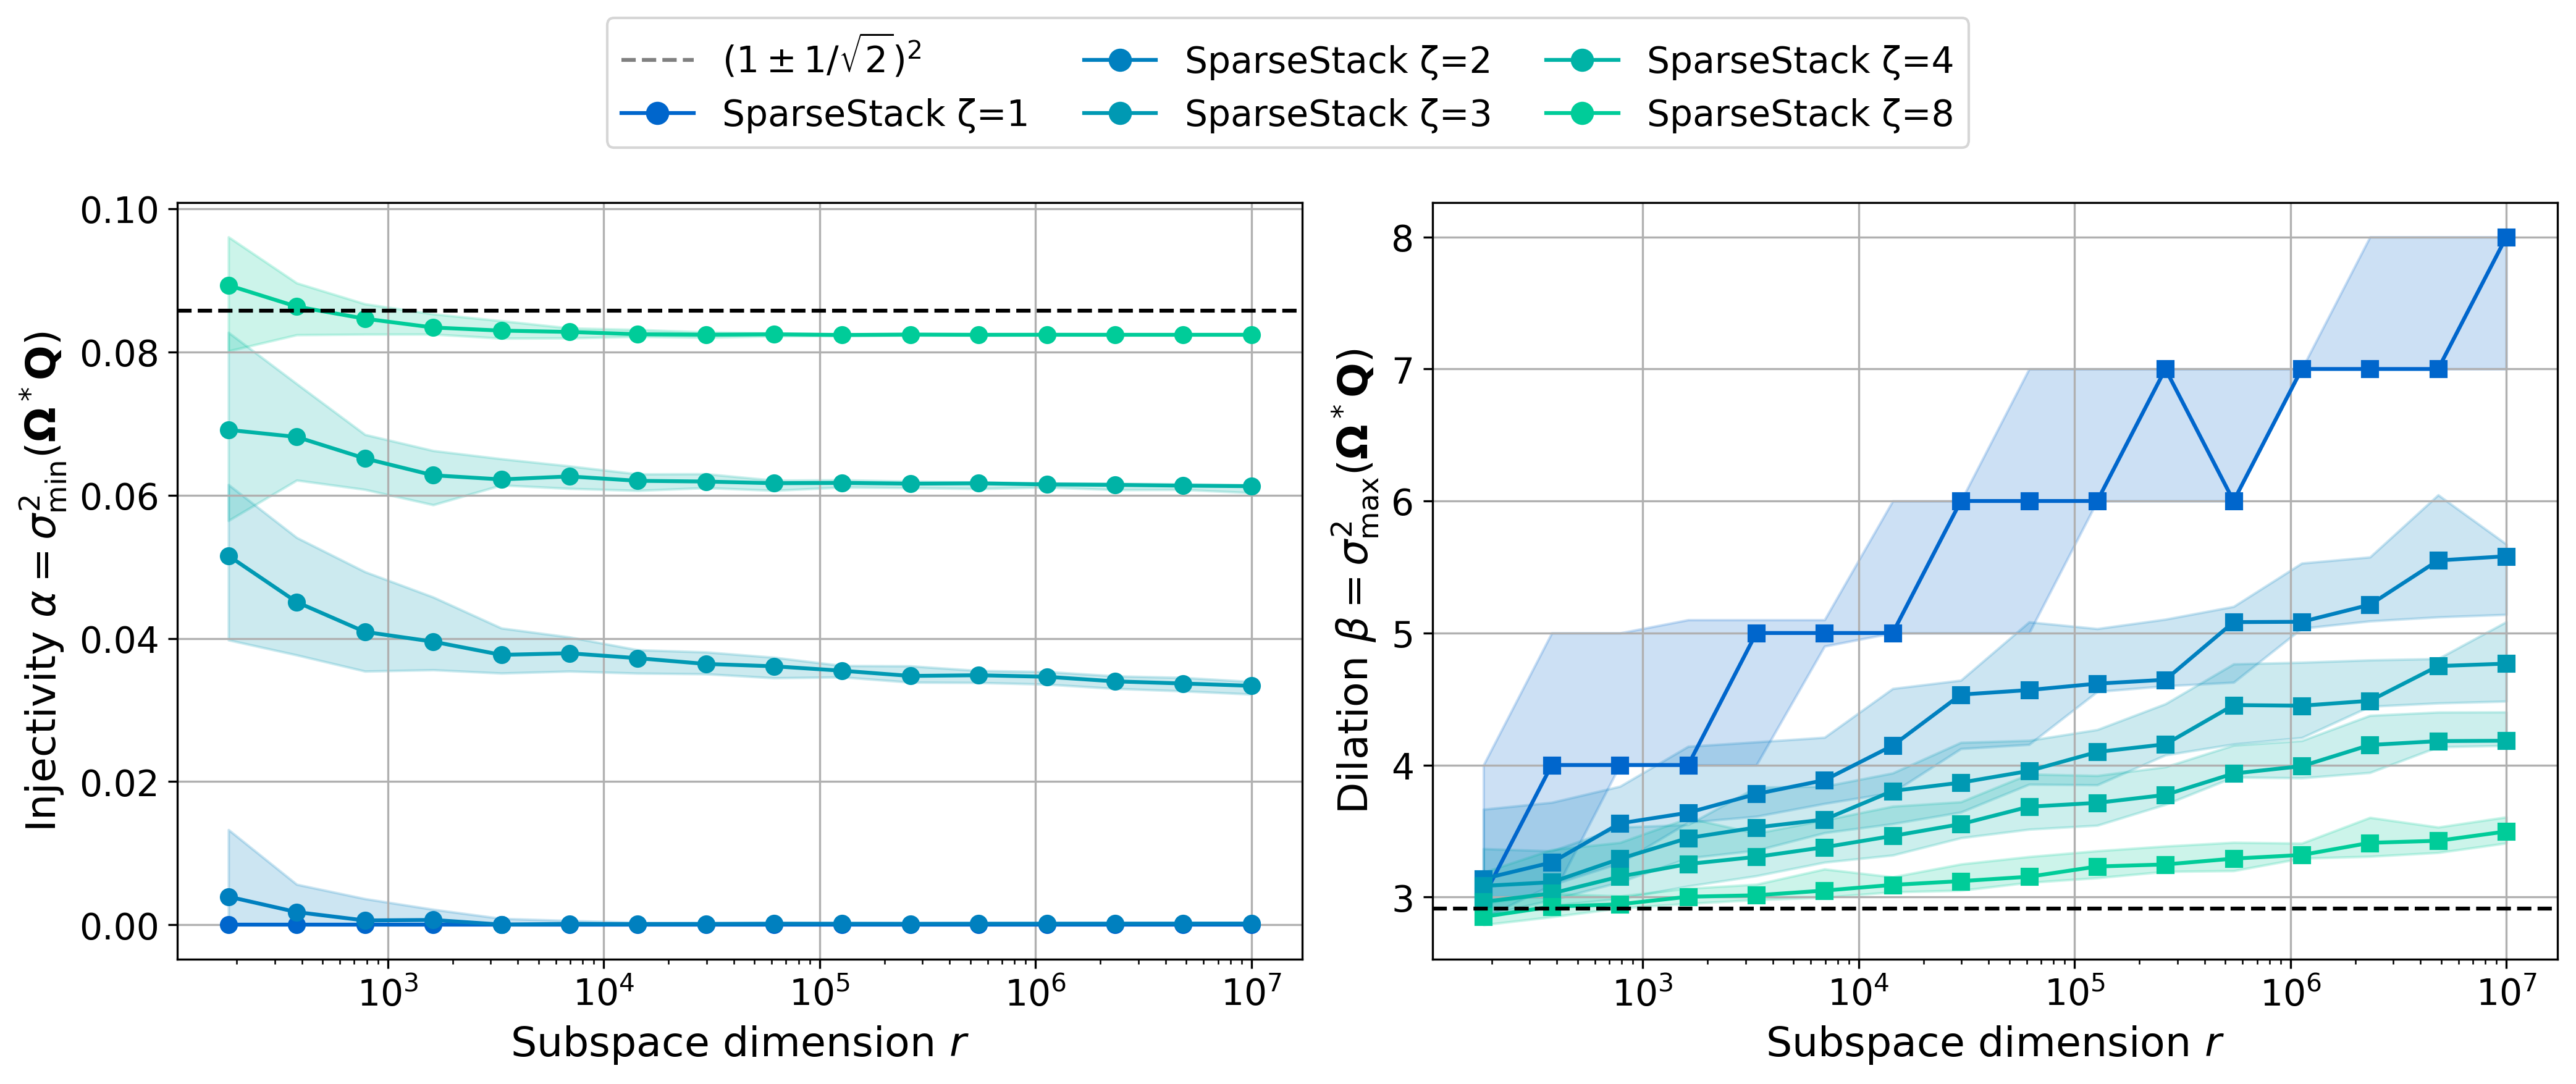

In [5]:
import scipy.io
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib.lines import Line2D

file_path = "data/sigma_min_max_results.mat"

data      = scipy.io.loadmat(file_path)
rs         = data['rs'].flatten()
mask       = (rs >= 100)
rs         = rs[mask]

zeta_list  = data['zeta_list'].flatten()
alphas     = data['alphas'][mask, :, :]
betas      = data['betas'][mask, :, :]

injectivity_thresh = (1 - 1/np.sqrt(2))**2
dilation_thresh    = (1 + 1/np.sqrt(2))**2

cmap_sparse = matplotlib.colormaps["winter"]
zeta_colors = cmap_sparse(np.linspace(0.4, 0.8, len(zeta_list)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharex=True, dpi=300)

for zi, ζ in enumerate(zeta_list):
    color = zeta_colors[zi]

    # Injectivity
    vals_min    = alphas[:, zi, :] + 1e-16
    med_min     = np.median(vals_min, axis=1)
    q10_min, q90_min = np.percentile(vals_min, [10, 90], axis=1)
    ax1.plot(rs, med_min, marker='o', linestyle='-', color=color)
    ax1.fill_between(rs, q10_min, q90_min, color=color, alpha=0.2)

    # Distortion 
    vals_max    = betas[:, zi, :]
    med_max     = np.median(vals_max, axis=1)
    q10_max, q90_max = np.percentile(vals_max, [10, 90], axis=1)
    ax2.plot(rs, med_max, marker='s', linestyle='-', color=color)
    ax2.fill_between(rs, q10_max, q90_max, color=color, alpha=0.2)

# horizontal dashed lines on both panels
ax1.axhline(injectivity_thresh, linestyle='--', color='black')
ax2.axhline(dilation_thresh,    linestyle='--', color='black')

for ax, ylabel in zip(
        (ax1, ax2),
        (r'Injectivity $\alpha=\sigma_{\min}^2(\mathbf{\Omega}^*\mathbf{Q})$',
         r'Dilation $\beta=\sigma_{\max}^2(\mathbf{\Omega}^*\mathbf{Q})$')
    ):
    ax.set_xscale('log')
    ax.grid(True)
    ax.set_xlabel(r'Subspace dimension $r$', fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)

pm_handle = Line2D([0], [0], linestyle='--', color='gray')
pm_label  = r'$(1\pm 1/\sqrt{2})^2$'

zeta_handles = [
    Line2D([0], [0], marker='o', linestyle='-', color=zeta_colors[i], markersize=8)
    for i in range(len(zeta_list))
]
zeta_labels = [f"SparseStack ζ={ζ}" for ζ in zeta_list]

handles = [pm_handle] + zeta_handles
labels  = [pm_label]  + zeta_labels

fig.legend(handles, labels,
           loc='upper center',
           bbox_to_anchor=(0.5, 1.18),
           ncol=3,
           fontsize=14,
           columnspacing=1.5)

plt.tight_layout()
plt.savefig("fig2.png", dpi=300, bbox_inches="tight")
plt.show()